In [1]:
from keras import Input
from keras.layers import BatchNormalization, Dropout, Dense, TimeDistributed,Dropout, Activation
import keras.backend as K
from keras.models import Sequential, Model
from  keras.layers import concatenate
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [88]:
data = pd.read_csv('./merge_all_flatten.csv')

기대이익을 활용한 dnn 모델

- 한 번에 생존기간, 일평균결제량, 기대이익을 모두 예측하는 모델을 만들고자 했다

In [ ]:
# model 1 
input_1 = Input(shape = (400,), name='input_1')
x = Dense(800,activation='relu')(input_1)
x = Dense(1000, activation='relu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(1)(x)
x = Activation('softmax',name="survival")(x)
#x = Activation('relu',name="survival")(x)

# model 2
y = Dense(400,activation='relu')(input_1)
y = Dense(800, activation='relu')(y)
y = Dense(800, activation='relu')(y)
y = Dense(500, activation='relu')(y)
y = Dense(500, activation='relu')(y)
y = Dense(400, activation='relu')(y)
y = Dense(1)(y)
y = Activation('relu',name="amount")(y)

# loss
#def loss(x,y):
#    return K.min(y_true-y_pred)
    
# Concat x, y
z = concatenate([x, y])
z = Dense(500, activation='relu')(z)
z = Dense(1000, activation='relu')(z)
z = Dense(500, activation='relu')(z)
z = Dense(1)(z)
z = Activation('relu', name="profit")(z)


# model
model = Model(inputs=input_1, outputs=[x,y,z])

losses = {
    "survival": "sparse_categorical_crossentropy",
    #"survival": "mse",
    "amount": "mse",
    "profit": "mse"}

model.compile(optimizer='rmsprop',
              loss=losses,
              metrics=['mse'])    

model.summary()

In [65]:
train_label = pd.read_csv("./train_label.csv")
train_label = train_label.sort_values(by =['acc_id'], axis = 0)
train_label['E_profit'] = profits

In [80]:
model.fit(data[data.columns[1:]], {"survival": train_label['survival_time'], "amount": train_label['amount_spent'],
                   "profit": train_label['E_profit']}, epochs=10, batch_size=128)

Epoch 1/10
40000/40000 [==============================] - 7s 178us/step - loss: nan - survival_loss: nan - amount_loss: 5259.2459 - profit_loss: 458.2241 - survival_acc: 0.0253 - amount_acc: 0.4097 - profit_acc: 0.0025 2s - loss: nan - survival_loss: nan - amount_loss: 7977.9702 - profit_loss: 477.9290 - survival_acc: 0.0262 - amount_acc
Epoch 2/10
40000/40000 [==============================] - 5s 129us/step - loss: nan - survival_loss: nan - amount_loss: 0.5373 - profit_loss: 457.9397 - survival_acc: 0.0253 - amount_acc: 0.4110 - profit_acc: 0.0000e+001s - loss: nan - survival_loss: nan - amount_loss: 0.5162 - profit_loss: 439.5448 - survival_acc: 0.0251 - a
Epoch 3/10
40000/40000 [==============================] - 5s 129us/step - loss: nan - survival_loss: nan - amount_loss: 0.5373 - profit_loss: 457.8489 - survival_acc: 0.0253 - amount_acc: 0.4110 - profit_acc: 0.0000e+000s - loss: nan - survival_loss: nan - amount_loss: 0.5193 - profit_loss: 442.0516 - survival_acc: 0.0250 - amount

In [81]:
k =model.predict(data[data.columns[1:]])

In [57]:
k[0].shape, k[1].shape, k[2].shape

((40000, 64), (40000, 1), (40000, 1))

In [85]:
k[0].max()

1.0

In [117]:
train_lable = pd.read_csv('./train_label_add.csv')
train_lable = train_lable.sort_values('acc_id')

In [144]:
data.head()

,acc_id,class,temp_cnt,private_shop,level,party_exp,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,p_etc_cnt,combat_play_time,pledge_rank
0,2,28,0.000000,84.900753,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,5,36,0.479728,0.000000,173,0.695285,0.000000,0.000000,0.000000,0.000000,...,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,69961
2,8,485,3.837822,0.000000,1922,0.000000,0.128368,4.270875,0.000000,0.000000,...,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,171584
3,17,34,3.358094,0.000000,687,8.823094,0.000000,0.000000,2.366129,12.398273,...,71.312495,21.689681,0.486279,9.230979,10.872763,1.591434,36.784494,12.514373,65.693573,11178
4,20,230,0.959456,2.917510,930,0.110339,1.540422,0.000000,2.366129,0.000000,...,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,5260


In [226]:
data2 = pd.merge(data, train_lable[train_lable['total_spent']!=0]['acc_id'], on ='acc_id', how='inner')

In [227]:
data2.shape

(23562, 129)

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2[data2.columns[1:]], train_lable[train_lable['total_spent']!=0]['total_spent'], test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((12369, 128), (4124, 128), (7069, 128), (12369,), (4124,), (7069,))

In [237]:

# Build a model
inputs = Input(shape=(128,))
layer1 = Dense(256, activation='relu')(inputs)
layer2 = Dense(512, activation='relu')(layer1)
layer3 = Dense(800, activation='relu')(layer2)
layer4 = Dense(800, activation='relu')(layer3)
layer5 = Dense(800, activation='relu')(layer4)
layer6 = Dense(512, activation='relu')(layer5)
layer7 = Dropout(0.5)(layer6)
layer8 = Dense(256, activation='relu')(layer7)
layer9 = Dense(32, activation='relu')(layer8)
predictions = Dense(1)(layer9)
model = Model(inputs=inputs, outputs=predictions)

# Define custom loss
def custom_loss(y_true,y_pred):

        return K.mean(K.square((y_pred - y_true)), axis=-1)
   
    # Return a function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_199 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_200 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_201 (Dense)            (None, 800)               410400    
_________________________________________________________________
dense_202 (Dense)            (None, 800)               640800    
_________________________________________________________________
dense_203 (Dense)            (None, 800)               640800    
_________________________________________________________________
dense_204 (Dense)            (None, 512)               410112    
__________

In [238]:
# Compile the model
model.compile(optimizer='adam',
              loss=custom_loss, # Call the loss function with the selected layer
              metrics=['accuracy',custom_loss])

In [239]:
# callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_custom_loss', patience=20, mode='min')

In [240]:
# train
model.fit(X_train, y_train, epochs=1000000, batch_size=128, validation_data=(X_test, y_test),
          callbacks=[early_stopping])

Train on 12369 samples, validate on 7069 samples
Epoch 1/1000000
12369/12369 [==============================] - 4s 331us/step - loss: 577367.4039 - acc: 0.0000e+00 - custom_loss: 577367.4039 - val_loss: 203.0442 - val_acc: 0.0000e+00 - val_custom_loss: 203.0442
Epoch 2/1000000
12369/12369 [==============================] - 1s 106us/step - loss: 157.4279 - acc: 0.0000e+00 - custom_loss: 157.4279 - val_loss: 80.1674 - val_acc: 0.0000e+00 - val_custom_loss: 80.1674
Epoch 3/1000000
12369/12369 [==============================] - 1s 107us/step - loss: 95.9589 - acc: 0.0000e+00 - custom_loss: 95.9589 - val_loss: 71.9441 - val_acc: 0.0000e+00 - val_custom_loss: 71.9441
Epoch 4/1000000
12369/12369 [==============================] - 1s 107us/step - loss: 117.8345 - acc: 0.0000e+00 - custom_loss: 117.8345 - val_loss: 64.4805 - val_acc: 0.0000e+00 - val_custom_loss: 64.4805
Epoch 5/1000000
12369/12369 [==============================] - 1s 108us/step - loss: 72.8669 - acc: 0.0000e+00 - custom_loss:

Epoch 41/1000000
12369/12369 [==============================] - 2s 133us/step - loss: 59.5250 - acc: 0.0000e+00 - custom_loss: 59.5250 - val_loss: 57.4763 - val_acc: 0.0000e+00 - val_custom_loss: 57.4763
Epoch 42/1000000
12369/12369 [==============================] - 2s 135us/step - loss: 53.7266 - acc: 0.0000e+00 - custom_loss: 53.7266 - val_loss: 59.9184 - val_acc: 0.0000e+00 - val_custom_loss: 59.9184
Epoch 43/1000000
12369/12369 [==============================] - 2s 136us/step - loss: 51.9206 - acc: 0.0000e+00 - custom_loss: 51.9206 - val_loss: 55.9218 - val_acc: 0.0000e+00 - val_custom_loss: 55.9218
Epoch 44/1000000
12369/12369 [==============================] - 2s 135us/step - loss: 52.0520 - acc: 0.0000e+00 - custom_loss: 52.0520 - val_loss: 65.0081 - val_acc: 0.0000e+00 - val_custom_loss: 65.0081
Epoch 45/1000000
12369/12369 [==============================] - 2s 137us/step - loss: 51.3595 - acc: 0.0000e+00 - custom_loss: 51.3595 - val_loss: 53.7038 - val_acc: 0.0000e+00 - val_c

In [241]:
y_pred = model.predict(X_test)

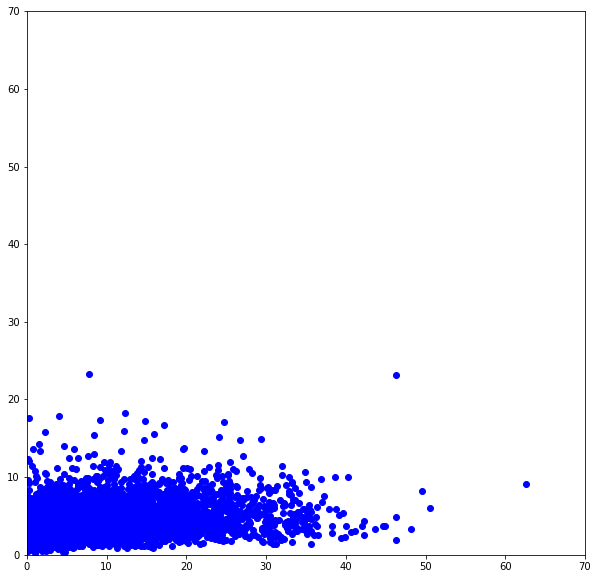

In [242]:
import matplotlib.pyplot as plt

b2 = y_test.reset_index()
b2['total_pred'] = y_pred
plt.figure(figsize=(10,10))
plt.plot( b2['total_spent'], b2['total_pred'],'bo')
plt.axis([0, 70, 0, 70])
plt.show()

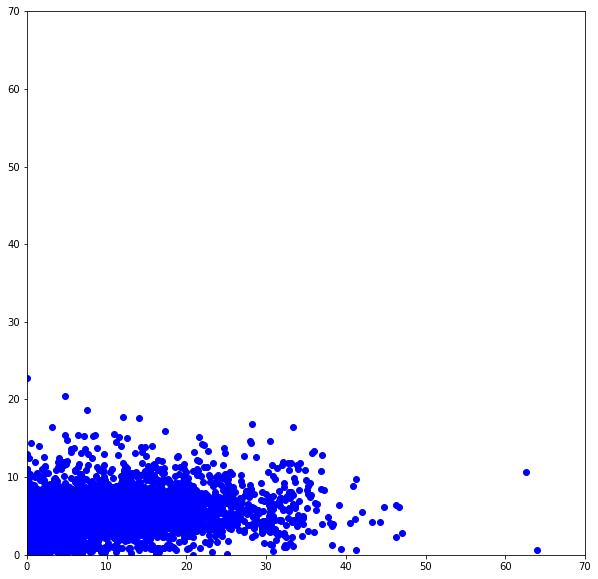

In [172]:
# loss = K.mean(K.square((y_pred - y_true)), axis=-1)*K.square((y_true)/97.515488- 0.5)

# rmse = 5.9105868458396715
import matplotlib.pyplot as plt

b = y_test.reset_index()
b['total_pred'] = y_pred
plt.figure(figsize=(10,10))
plt.plot( b['total_spent'], b['total_pred'],'bo')
plt.axis([0, 70, 0, 70])
plt.show()

In [223]:
from sklearn.metrics import mean_squared_error as mse
linreg_RMSE = np.sqrt(mse(b['total_pred'], b['total_spent']))
linreg_RMSE

5.9105868458396715

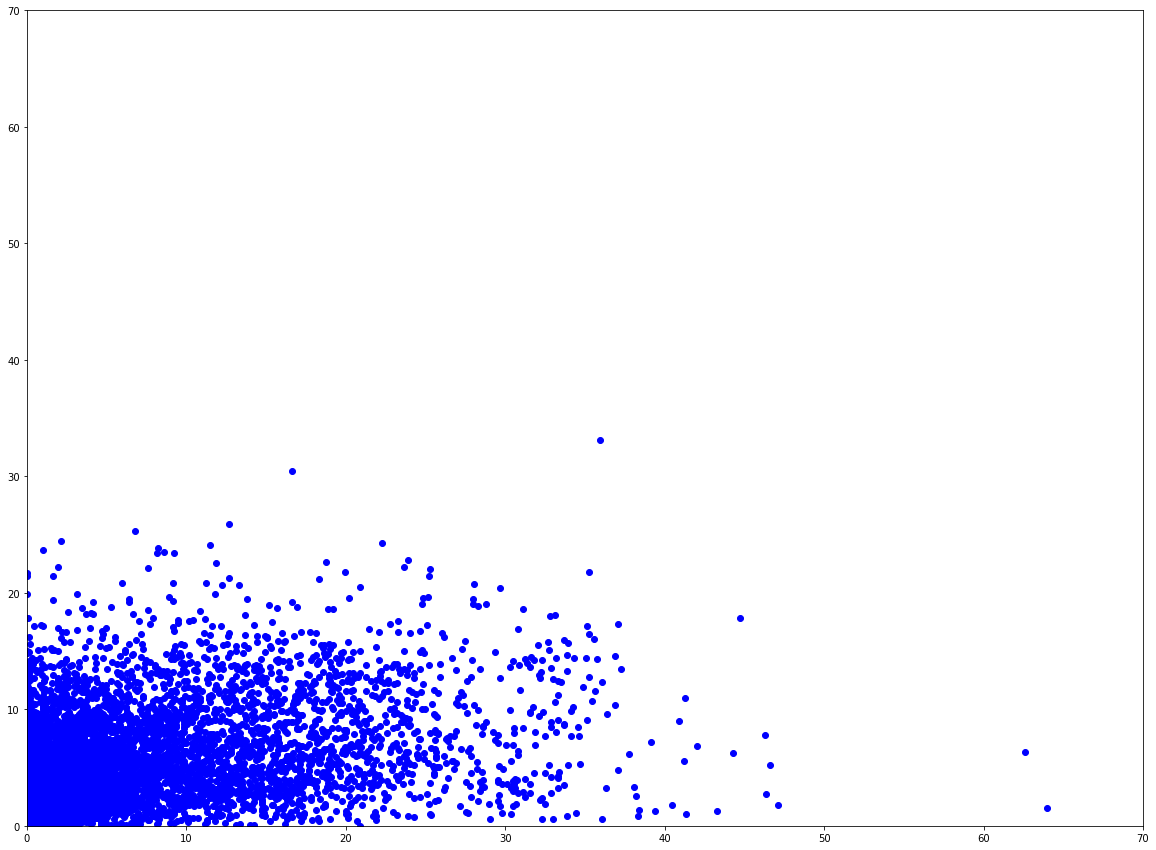

In [157]:
b = y_test.reset_index()
b['total_pred'] = y_pred
plt.figure(figsize=(20,15))
plt.plot( b['total_spent'], b['total_pred'],'bo')
plt.axis([0, 70, 0, 70])
plt.show()

In [74]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [87]:
model.predict(a)

array([[2.8146503],
       [5.6879253],
       [8.561201 ]], dtype=float32)

(array([    0.,     0.,     0.,     0.,     0., 17593.,   266.,   217.,
          500.,   218.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

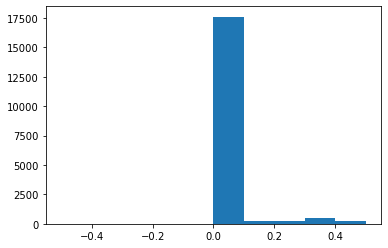

In [191]:
plt.hist(train_lable['total_spent'], range=(0,0))

In [193]:
train_lable[train_lable['total_spent']==0].count()

acc_id           16438
survival_time    16438
amount_spent     16438
secession        16438
total_spent      16438
dtype: int64

In [194]:
train_lable[train_lable['amount_spent']==0].count()

acc_id           16438
survival_time    16438
amount_spent     16438
secession        16438
total_spent      16438
dtype: int64

In [3]:
from score_function import score_function

In [4]:
score, profits = score_function("./train_label.csv","./train_label.csv")

91693.76240883442


In [5]:
profits

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.5240994764327624,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.7540786813164786,
 0.0,
 12.36820367959375,
 2.0152415072013765,
 0.0,
 1.0027483128192536,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.447487523552205,
 0.0,
 0.0,
 0.0,
 0.0,
 1.461732234430399,
 0.0,
 0.0,
 3.549085865197008,
 1.0495237443210264,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.48724407814346626,
 0.0,
 4.872440781434663,
 1.3623344424891317,
 0.0,
 4.640512600238373,
 0.0,
 0.0,
 0.0,
 0.0,
 20.25960876920533,
 0.0,
 0.0,
 3.508157362632957,
 0.5077083294254919,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0357057584834024,
 0.0,
 4.867568340653228,
 0.0,
 0.0,
 2.0162159953576633,
 0.0,
 5.63643949596362,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 28.9422982417219,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [90]:
train_label.to_csv("./train_profit.csv", index=False)

Text(0, 0.5, 'E_profit')

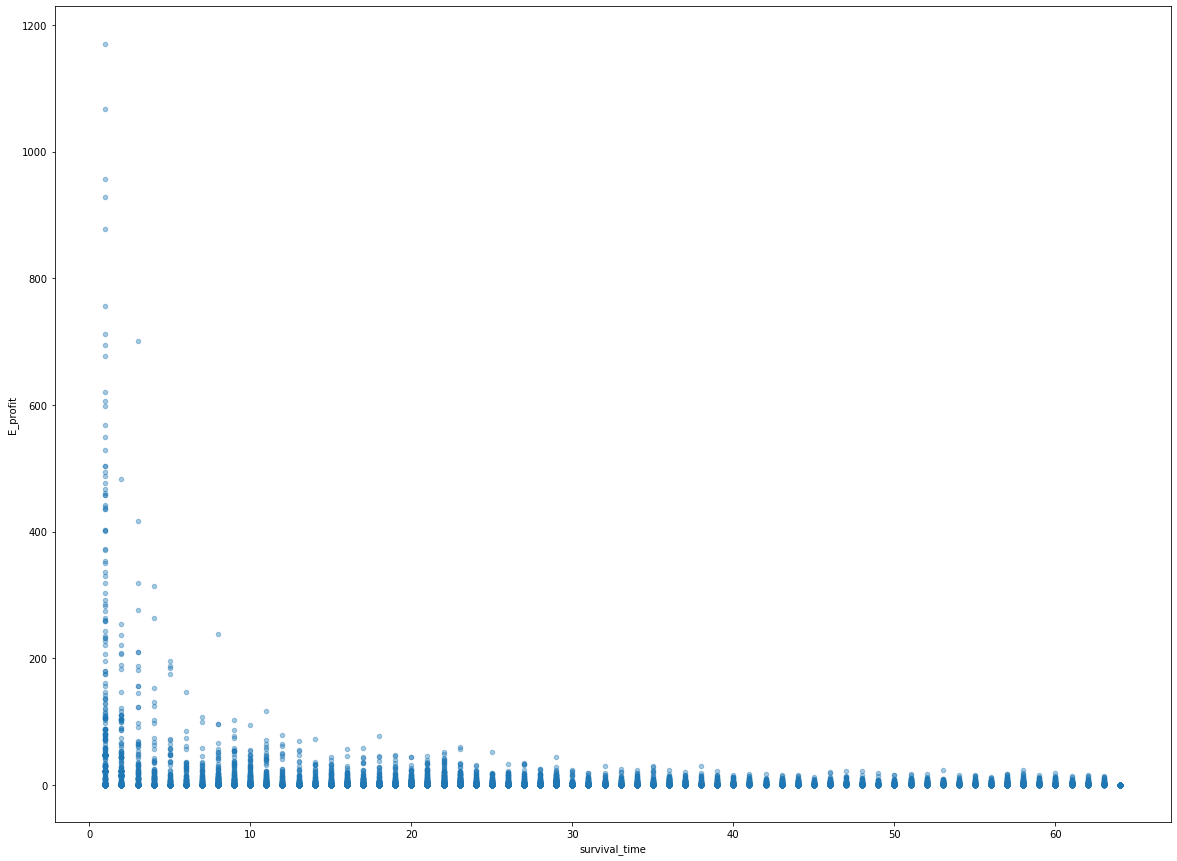

In [129]:
import matplotlib.pyplot as plt
train_label.plot(kind='scatter', x= 'survival_time', y='E_profit', alpha=0.4,figsize=(20,15))
plt.xlabel('survival_time')
plt.ylabel('E_profit')
# E_profit : 기대이익

In [130]:
train_label['total_spent'] = train_label['survival_time'] * train_label['amount_spent']

Text(0, 0.5, 'amount_spent')

<Figure size 1440x1080 with 0 Axes>

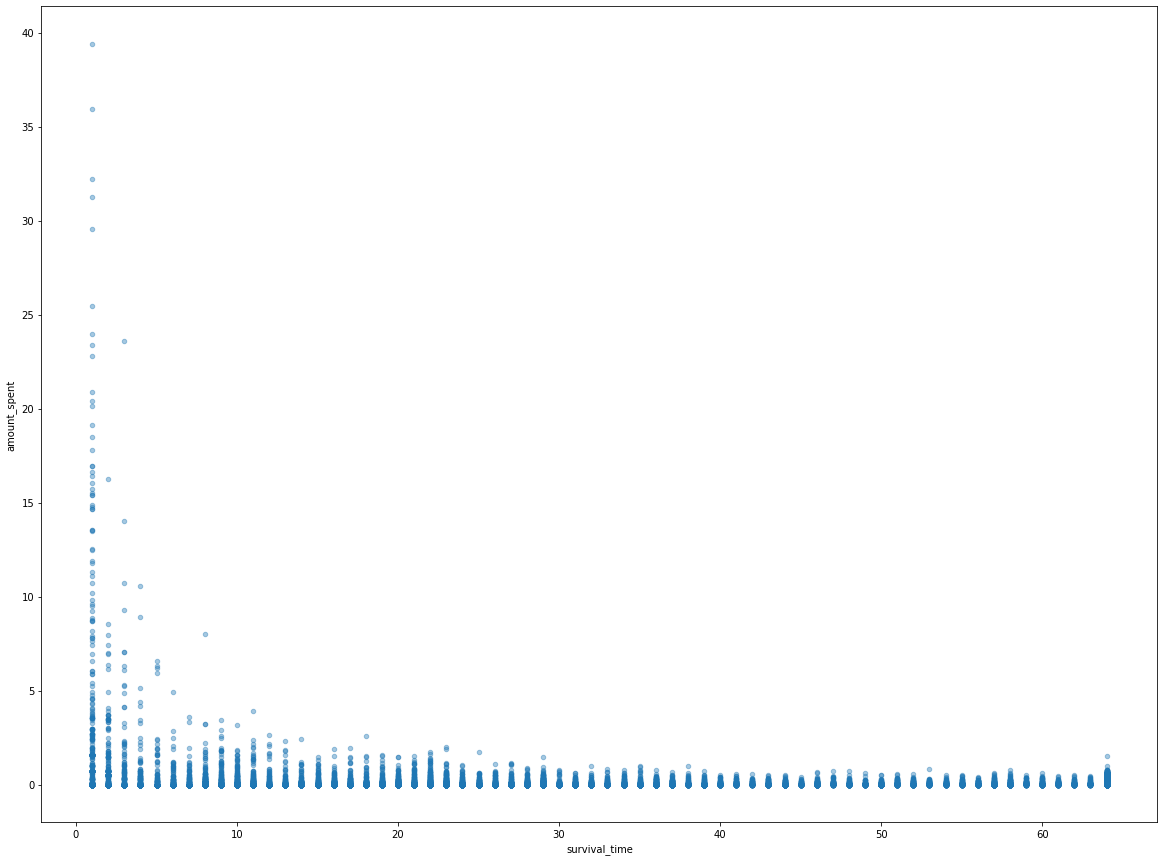

In [145]:
plt.figure(figsize=(20,15))
train_label.plot(kind='scatter', x= 'survival_time', y='amount_spent', alpha=0.4,figsize=(20,15))
plt.xlabel('survival_time')
plt.ylabel('amount_spent')

Text(0, 0.5, 'total_spent')

<Figure size 1440x1080 with 0 Axes>

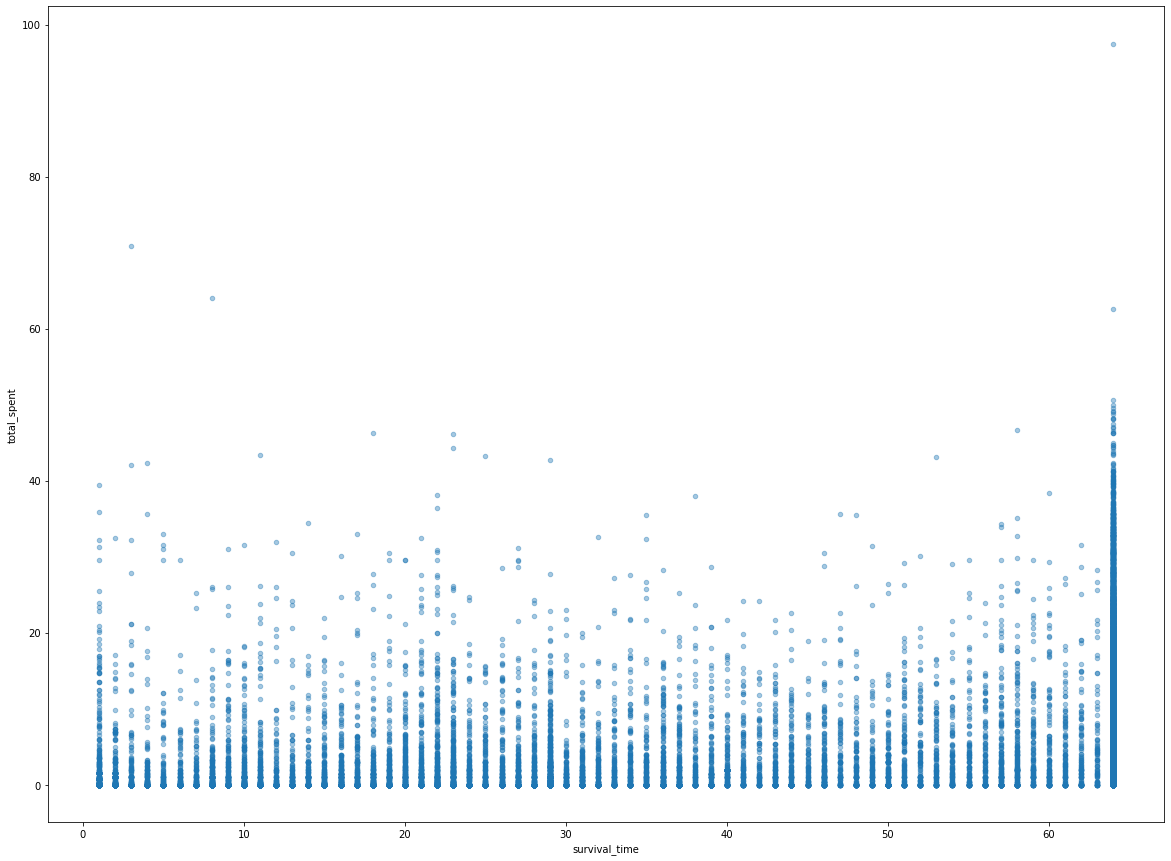

In [137]:
plt.figure(figsize=(20,15))
train_label.plot(kind='scatter', x= 'survival_time', y='total_spent', alpha=0.4,figsize=(20,15))
plt.xlabel('survival_time')
plt.ylabel('total_spent')

(array([516., 145.,  79., 112.,  33.,  17.,   3.,   6.,   4., 141.]),
 array([ 1. ,  7.3, 13.6, 19.9, 26.2, 32.5, 38.8, 45.1, 51.4, 57.7, 64. ]),
 <a list of 10 Patch objects>)

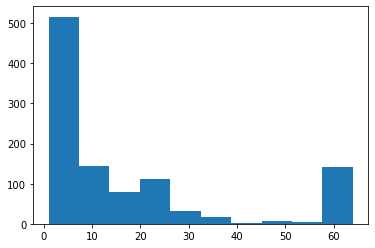

In [170]:
plt.hist(train_label[train_label['amount_spent']>=0.55]['survival_time'])

In [169]:
train_label[train_label['amount_spent']>=0.6].count()

acc_id           913
survival_time    913
amount_spent     913
E_profit         913
total_spent      913
dtype: int64